In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras import models, layers 
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=50

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

68

In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 0 0 1 1 0 1 2 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 2 2 0 0 1 1]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


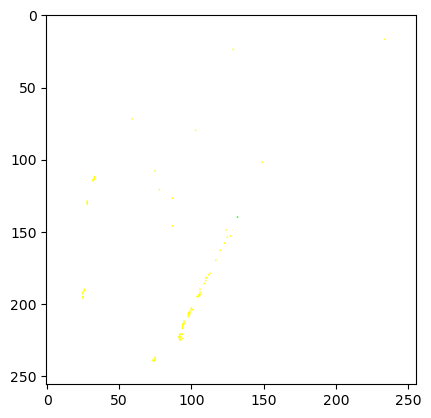

In [9]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy())

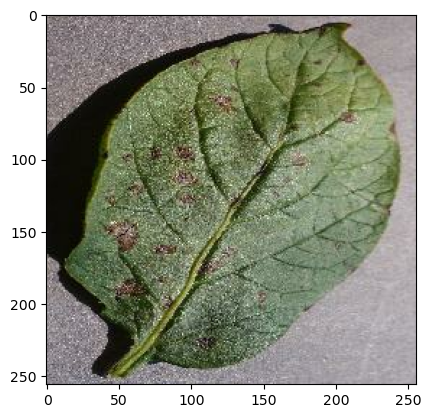

In [10]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

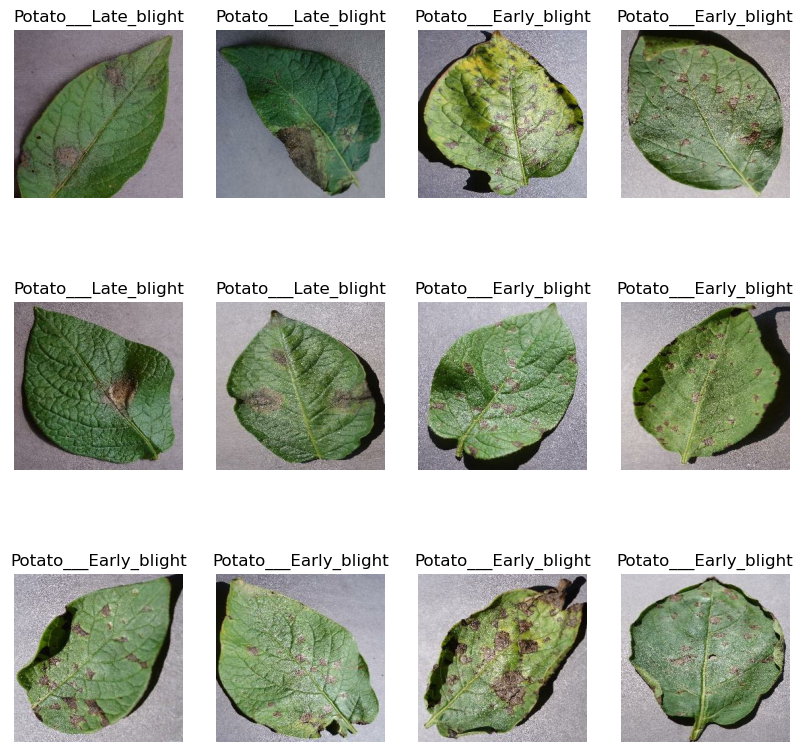

In [11]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [12]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [13]:
train_ds= dataset.take(54)
len(train_ds)

54

In [14]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [15]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [16]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [17]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [18]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 8.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):

 ds_size = len(ds)

 if shuffle: 
    ds = ds.shuffle(shuffle_size, seed=12)

 train_size= int(train_split * ds_size) 
 val_size= int(val_split * ds_size)

 train_ds = ds.take (train_size)

 val_ds = ds.skip(train_size).take(val_size) 
 test_ds = ds.skip(train_size).skip(val_size)

 return train_ds, val_ds, test_ds

In [19]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

54

In [21]:
len(val_ds)

14

In [22]:
len(test_ds)

0

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [25]:
pip install --upgrade tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [26]:
#resize_and_rescale = tf.keras.Sequential([ 
 #   layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE), 
#    layers.experimental.preprocessing. Rescaling(1.0/255) 
#])

In [27]:
#data_augmentation = tf.keras.Sequential([
    #layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"), 
    #layers.experimental.preprocessing. RandomRotation(0.2) 
#])

In [28]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [30]:
def resize_and_rescale(image):
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    image = image / 255.0
    return image
#resize_and_rescale = keras.Sequential([
#    Resizing(IMAGE_SIZE, IMAGE_SIZE),
 #   Rescaling(1./255),
#])

In [31]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"), 
    layers.RandomRotation(0.2)
])

CNN Model

In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models

BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
n_classes = 50

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"), 
    layers.RandomRotation(0.2)
])

model = models.Sequential([ 
    layers.InputLayer(input_shape=input_shape),  # Define the input shape here
    resize_and_rescale, 
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)), 
    layers.Flatten(), 
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.summary()


C:\Users\kurum\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           3,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 186,802 (729.70 KB)

 Trainable params: 186,802 (729.70 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [35]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 56s 931ms/step - accuracy: 0.4262 - loss: 1.7772 - val_accuracy: 0.5580 - val_loss: 0.8166
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 48s 883ms/step - accuracy: 0.6439 - loss: 0.7275 - val_accuracy: 0.7589 - val_loss: 0.5415
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 53s 991ms/step - accuracy: 0.7831 - loss: 0.4972 - val_accuracy: 0.7746 - val_loss: 0.5394
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 48s 890ms/step - accuracy: 0.8328 - loss: 0.3912 - val_accuracy: 0.8884 - val_loss: 0.2859
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 48s 898ms/step - accuracy: 0.8925 - loss: 0.2727 - val_accuracy: 0.8973 - val_loss: 0.2950
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 181s 3s/step - accuracy: 0.8945 - loss: 0.2574 - val_accuracy: 0.8527 - val_loss: 0.3596
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 53s 984ms/step - accuracy: 0.8889 - loss: 0.2588 - val_accuracy: 0.9286 - val_loss: 0.1778
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9198 - loss: 0.2059 - val_accuracy:

In [36]:
scores = model.evaluate(train_ds)

54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 190ms/step - accuracy: 0.9523 - loss: 0.1255


In [37]:
scores

[0.1163187325000763, 0.9548611044883728]

In [38]:
history

In [39]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [40]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [41]:
history.history['accuracy']

[0.49710649251937866,
 0.6741898059844971,
 0.7899305820465088,
 0.8738425970077515,
 0.9004629850387573,
 0.8790509104728699,
 0.9068287014961243,
 0.9097222089767456,
 0.9120370149612427,
 0.9340277910232544,
 0.9403935074806213,
 0.9467592835426331,
 0.9554398059844971,
 0.9594907164573669,
 0.9618055820465088,
 0.9606481194496155,
 0.9577546119689941,
 0.9704861044883728,
 0.9681712985038757,
 0.9652777910232544,
 0.9803240895271301,
 0.9722222089767456,
 0.9780092835426331,
 0.9780092835426331,
 0.9797453880310059,
 0.9780092835426331,
 0.984375,
 0.9832175970077515,
 0.9832175970077515,
 0.9756944179534912,
 0.9884259104728699,
 0.9785879850387573,
 0.9832175970077515,
 0.9861111044883728,
 0.9849537014961243,
 0.9785879850387573,
 0.9913194179534912,
 0.9832175970077515,
 0.9756944179534912,
 0.9872685074806213,
 0.9837962985038757,
 0.9861111044883728,
 0.9861111044883728,
 0.9924768805503845,
 0.9861111044883728,
 0.9722222089767456,
 0.9936342835426331,
 0.9913194179534912,
 

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

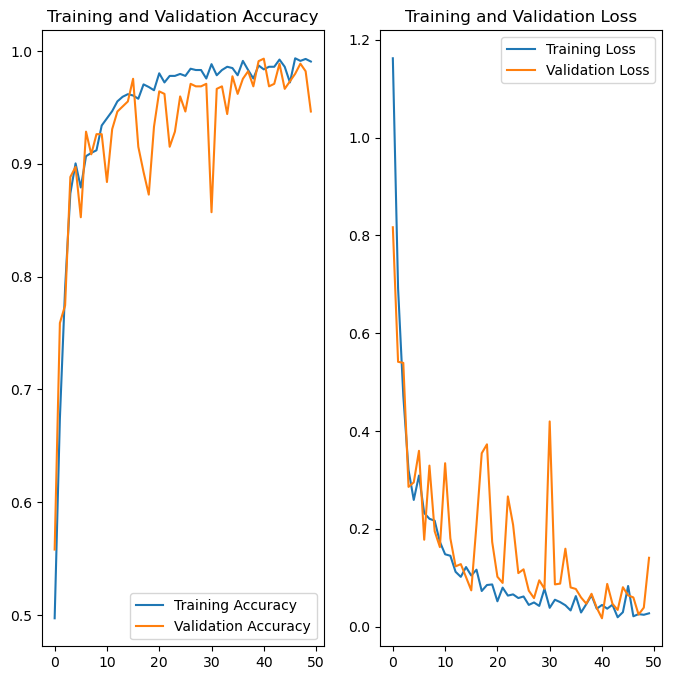

In [43]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [44]:
import numpy as np

arr = [3.9286765e-09, 1.0000000e+00, 2.3025424e-17]
result = np.argmax(arr)
print(result)

  # output 1 means maximum accurate value falls at 1

1


first image to predict
first image actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
predicted label: Potato___Early_blight


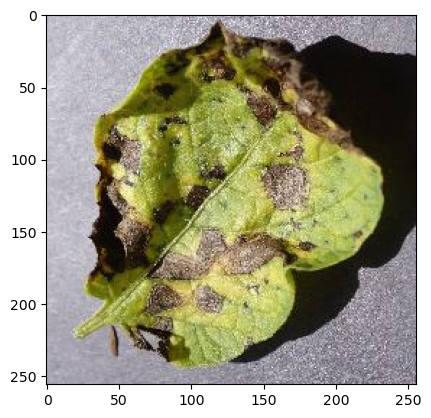

In [45]:
import numpy as np
for image_batch, label_batch in val_ds.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    first_label = label_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("first image actual label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    

In [46]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 (np.max(predictions[0])), 2)
    return predicted_class, confidence

<>:8: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:8: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
C:\Users\kurum\AppData\Local\Temp\ipykernel_14480\3400068051.py:8: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  confidence = round(100 (np.max(predictions[0])), 2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


TypeError: 'int' object is not callable

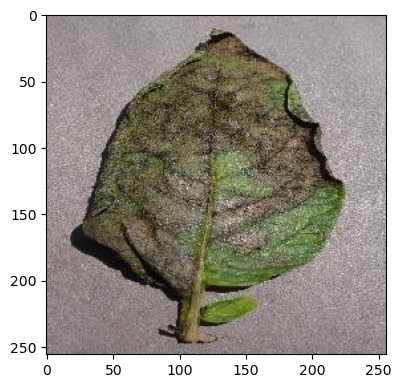

In [50]:
plt.figure(figsize=(15, 15))
for images,labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \nPredicted: {predicted_class} ({confidence}%)")
        plt.axis("off")
   


In [52]:
import os
#to auto increment we are doing this code
# Get the list of files in the models directory
files = os.listdir("./models")

# Extract numeric parts from filenames like 'model_v1.keras'
numeric_versions = []
for file in files:
    # Extract the digits after 'model_v' and before '.keras'
    if file.startswith("model_v") and file.endswith(".keras"):
        try:
            version = int(file.split('model_v')[1].split('.keras')[0])  # Extract the numeric part
            numeric_versions.append(version)
        except ValueError:
            pass  # Skip files that don't have a valid integer version

# Add [0] to handle the case where no valid version is found
model_version = max(numeric_versions + [0]) + 1

# Save the model with the next version number
model.save(f"./models/model_v{model_version}.keras")


In [ ]:
#model_version = 2
#model.save(f"./models/model_v{model_version}.keras")  # Saving in the native Keras format


In [74]:
import os

# Define the relative path for the models directory
model_dir = "./models"

# Check if the directory exists, if not create it
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"Created directory: {model_dir}")
else:
    print(f"Directory already exists: {model_dir}")

# Find the highest model version and increment it by 1
model_version = max([int(i) for i in os.listdir(model_dir) if i.isdigit()] + [0]) + 1

# Use the recommended .keras or .h5 extension when saving
model_path = f"{model_dir}/model_v{model_version}.keras"  # Using .keras extension

# Save the model with the appropriate extension
model.save(model_path)

print(f"Model saved as: {model_path}")


Directory already exists: ./models
Model saved as: ./models/model_v1.keras


In [80]:
model.save("../potatoes.h5")

TypeError: cannot pickle 'module' object